# Regressão logística: Scikit-learn sobre dataset Iris

## O que vamos fazer?
- Descarregar o dataset Iris.
- Pré-processar o dataset usando métodos de Scikit-learn.
- Formar um modelo de classificação multiclasse por validação cruzada com Scikit-learn.

Agora vamos resolver o mesmo modelo usando métodos de Scikit-learn. 

Pode ter como referência este exemplo: [Logistic regression 3-class classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html):

In [1]:
# TODO: Importar todos os módulos necessários para esta célula

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

## Carregar o dataset Iris

In [8]:
# TODO: Carregar o dataset Iris como arrays X e Y

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Pré-processar os dados

Pré-processar os dados com métodos de Scikit-learn, do mesmo modo que fez no exercício de Scikit-learn de regressão linear:

- Reordená-los aleatoriamente. 
- Normalizar, se necessário.
- Dividi-los em subsets de formação e testes

Nesta ocasião, de novo, iremos fazer a validação cruzada por K-fold, já que o dataset é muito pequeno (150 exemplos).

In [9]:
# TODO: Reordenar os dados aleatoriamente

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]
X

array([[5.4, 3. , 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.3, 5.7, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3.2, 1.4, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.6, 4.4, 1.2],
       [5.8, 2.7, 3.9, 1.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.5, 4.9, 1.5],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5. , 2. , 3.5, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [6.4, 3.1, 5.5, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 3.3, 6. , 2.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.2, 5.7, 2.3],
       [6. , 3. , 4.8, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [5.4, 3.4, 1.7, 0.2],
       [5.6, 2

In [10]:
# TODO: Normalizar, se necessário

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.30555556, 0.41666667, 0.59322034, 0.58333333],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.55555556, 0.58333333, 0.77966102, 0.95833333],
       [0.41666667, 0.29166667, 0.69491525, 0.75      ],
       [0.66666667, 0.54166667, 0.79661017, 0.83333333],
       [1.        , 0.75      , 0.91525424, 0.79166667],
       [0.08333333, 0.5       , 0.06779661, 0.04166667],
       [0.55555556, 0.54166667, 0.62711864, 0.625     ],
       [0.33333333, 0.25      , 0.57627119, 0.45833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.55555556, 0.20833333, 0.66101695, 0.58333333],
       [0.27777778, 0.70833333, 0.08474576, 0.04166667],
       [0.66666667, 0.41666667, 0.71186441, 0.91666667],
       [0.19444444, 0.        , 0.42372881, 0.375     ],
       [0.36111111, 0.29166667, 0.54237288, 0.5       ],
       [0.25      , 0.58333333, 0.06779661, 0.04166667],
       [0.16666667, 0.41666667,

In [11]:
# TODO: Dividi-los em subsets de formação e testes

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Formar um modelo inicial
- Formar um modelo inicial sobre o subset de formação sem regularização. 
- Comprovar a idoneidade do modelo e voltar a formá-lo se necessário.

A função de Scikit-learn que pode utilizar é [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) com esquema OvR (“one-vs-rest”, uma classe contra o resto).

Avaliar sobre o subset de teste com o seu método de *score()*:

In [12]:
# TODO: Formar o seu modelo no subconjunto de formação não regularizada e avaliar sobre o de teste

clf = LogisticRegression(random_state=42, multi_class='ovr').fit(X_train, y_train)
print("Score de treino:", clf.score(X_train, y_train))
print("Score de teste:", clf.score(X_test, y_test))

Score de treino: 0.9166666666666666
Score de teste: 0.7666666666666667


### Pode-se ver que o modelo está muito sobreajustado

## Encontrar a regularização ótima através de validação cruzada
- Formar um modelo por cada valor de regularização a considerar.
- Forma-os e avalia-os sobre um fold do subset de formação usando K-fold. 
- Escolher o modelo e a sua regularização ótima.

O método LogisticRegression aplica por defeito uma regularização L2 por defeito, mas podemos dar-lhe um valor de *C* determinado. *C* atua como o inverso do fator de regularização *lambda*, pelo que os valores menores, maior regularização:

In [15]:
# TODO: Formar um modelo diferente por cada C sobre um fold de K-fold diferente

# Usar os valores de lambda que considerávamos em exercícios anteriores
lambdas = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Calcular o C correspondente a cada um
cs = [1/l if l != 0 else 0 for l in lambdas]

# Iterar sobre os 5 splits, para os seus modelos e avalia-os no subset do CV gerado
log_models = [] 
best_model = None

for c in cs:
    model = LogisticRegression(random_state=42, multi_class='ovr', C=c)
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    score = np.mean(scores)
    print("Cs:", c)
    print("Scores:", scores)
    print("Média dos Scores:", score)
    print()
    log_models.append(round(score, 4))

print("Acurácias em cada fold:", log_models)
print("Acurácia média:", np.mean(log_models))

Cs: 10.0
Scores: [0.9        0.96666667 0.96666667 0.93333333 0.86666667]
Média dos Scores: 0.9266666666666665

Cs: 100.0
Scores: [1.         1.         0.96666667 0.93333333 0.86666667]
Média dos Scores: 0.9533333333333335

Cs: 1000.0
Scores: [1.         1.         0.96666667 0.93333333 0.86666667]
Média dos Scores: 0.9533333333333335

Cs: 10000.0
Scores: [1.         1.         0.96666667 0.96666667 0.9       ]
Média dos Scores: 0.9666666666666668

Cs: 99999.99999999999
Scores: [1.         1.         0.96666667 0.93333333 0.9       ]
Média dos Scores: 0.9600000000000002

Acurácias em cada fold: [0.9267, 0.9533, 0.9533, 0.9667, 0.96]
Acurácia média: 0.952


## Avaliar o modelo finalmente sobre o subset de teste

- Mostrar os coeficientes e intercept do melhor modelo. 
- Avaliar o melhor modelo sobre o subset de teste inicial.
- Calcular os acertos e falhas no subset de teste e representá-los graficamente.

Coeficientes de intercept do modelo formado
Intercept: 4.968756274236784   Coeficientes: [ -5.28870634  11.78220175 -14.90773136 -13.79606419]

y_test_pred [0 1 1 2 2 2 0 1 0 2 1 0 0 2 2 1 2 2 0 0 1 2 1 1 2 1 0 1 2 2]
y_test [0 1 1 2 2 2 0 1 0 2 1 0 0 2 2 2 2 2 0 0 1 2 1 1 1 1 0 2 2 2]
Mean Accuracy: 0.90


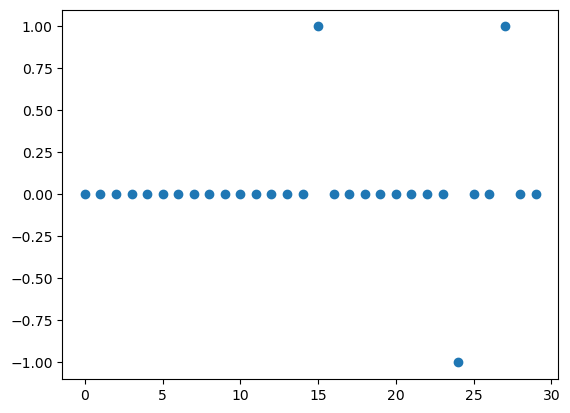

In [16]:
# TODO: Avaliar o melhor modelo sobre o subset de teste inicial

# O melhor modelo foi com lambda = 0.0001
model = LogisticRegression(random_state=42, multi_class='ovr', C=cs[3])
model.fit(X_train, y_train)

# Mostrar os coeficientes e intercept do melhor modelo formado
print('Coeficientes de intercept do modelo formado')
print("Intercept:", model.intercept_[0], "  Coeficientes:", model.coef_[0])  # Mostrar o intercept como o primeiro coeficiente
print()  
    
# Realizar as previsões sobre o subset de teste
y_test_pred = model.predict(X_test)
print("y_test_pred", y_test_pred)
print("y_test", y_test)

# Calcular a métrica de avaliação do modelo de precisão (“accuracy”) média (o seu método score())
mean_accuracy = model.score(X_test, y_test)
print("Mean Accuracy: %.2f" % mean_accuracy)

# Calcular os acertos e falhas no subset de teste e representá-los graficamente
results = y_test - y_test_pred

# Representar graficamente
plt.figure(1)

plt.scatter(range(len(results)), results)

plt.show()

### Para concluir comprovou-se que o modelo obteve uma boa acurácia/exatidão de 0.93. Em 30 apenas 3 falharam.